1. Para los datos del laboratorio anterior aplicar la ecuacion normal.

In [36]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [2]:
# Plano y = 2.1*x_1 + 3.1*x_2
def y(x1, x2):
    return 0 + 2.1*x1 + 3.1*x2  #Th_0 = 0; Th_1 = 2.1; Th_2 = 3.1

In [9]:
# Función para aplicar la ecuacion normal con parametro de entrada m
# m: numero de datos de entrenamiento
def Normal_equation(m):
    
    # Numero de parametros a optimizar en este caso se trata de un plano (n=3)
    n = 3
    
    # Generando dos conjuntos de caracteristicas aleatorias con m datos de entrenamiento
    x1 = np.array([random.randint(1, 50) for num in range(m)])
    x2 = np.array([random.randint(1, 50) for num in range(m)])
    # 
    Y = y(x1, x2)
    
    # Creando la matriz X de dimension nxm
    X = np.zeros((n, m))
    X[0] = np.ones(m)
    X[1] = x1
    X[2] = x2
    
    ## ======================================================================================= ##
    
    # Ecuacion normal, dim(X): m x (n+1)
    
    X = X.T
    A = X.T @ X
    AI = np.linalg.inv(A)
    Th = AI @ X.T @ Y
    
    return Th
        

In [10]:
multivariate_regresion(10)

array([-3.69482223e-13,  2.10000000e+00,  3.10000000e+00])

2. Tomar el dataset de las casas de Boston y construir un modelo de regresión mutivariada.

```
# Tomar los datos de las casas de boston y hacer una regresion lineal tomando 
# el average number of rooms per dwelling.
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

df = pd.DataFrame({"mean_":target, "rm":data[:,5]})

```

In [14]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

In [15]:
raw_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


In [16]:
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])

In [18]:
target = raw_df.values[1::2, 2]

In [20]:
df = pd.DataFrame({"mean_":target, "rm":data[:,5]})

In [21]:
df

,mean_,rm
0,24.0,6.575
1,21.6,6.421
2,34.7,7.185
3,33.4,6.998
4,36.2,7.147
...,...,...
501,22.4,6.593
502,20.6,6.120
503,23.9,6.976
504,22.0,6.794


Tomemos en este caso como la variable esperada $Y = mean $ que es el valor medio de las viviendas ocupadas por sus propietarios en ` $1000 ` con la caracteristica dada $x = rm$ que es el promedio de cuartos por vivienda. Entonces se propone el siguiente modelo que pueda predecir la relación entre $Y$ y $x$.

$$Y = \theta_0 + \theta_1x$$

Se construye sobre el dataframe una regresión multivariada usando la ecuación normal para hallar los parametros $\theta_0$ y $\theta_1$ que mejor modelan la regresión.

In [49]:
# Regresion lineal
n = 2

Y = np.array(df['mean_'])
x1 = np.array(df['rm'])

# m = 506 = len(x1)
# Construyendo la matriz X (features y datos de entrenamiento)
X = np.zeros((n, len(x1)))
X[0] = np.ones(len(x1))
X[1] = x1

# Aplicando ecuacion normal para hallar los parametros mas optimos de Th_0 y Th_1
X = X.T
A = X.T @ X
AI = np.linalg.inv(A)
Th = AI @ X.T @ Y

In [50]:
Th_0 = Th[0]
Th_1 = Th[1]

def lineal_rect(x):
    return Th_0 + Th_1 * x

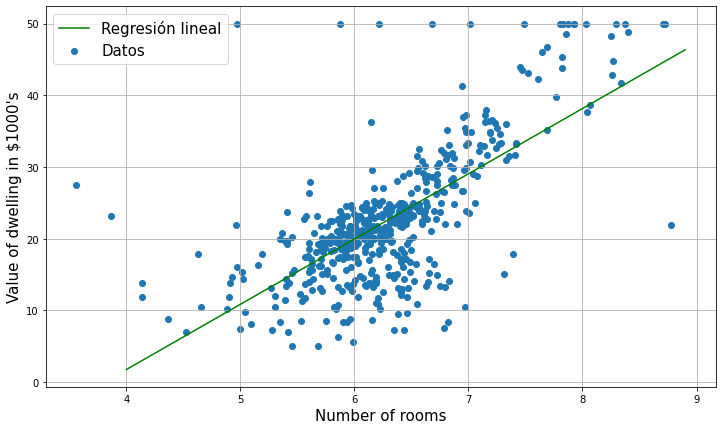

In [63]:
# Plotting de la regresion multivariada (lineal) y los datos del dataframe
plt.figure(figsize=(12, 7))
x = np.arange(4, 9, 0.1)
y = lineal_rect(x)
plt.scatter(x1, Y, label='Datos')
plt.plot(x, y, c='green', label='Regresión lineal')
plt.xlabel('Number of rooms', fontsize=15)
plt.ylabel("Value of dwelling in $1000's", fontsize=15)
plt.legend(fontsize=15)
plt.grid()
plt.show()